In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv(r"/content/drive/MyDrive/Test_data.csv")

In [5]:
num_cols = (df.select_dtypes(include=[np.float])).columns

In [6]:
#instrumentalness->look for this it has 0 values till 25 %
#liveness ,percent
#loudness
#speechiness
list_per = []


In [7]:
def count_percent(a):
 
    Q1 = a.quantile(0.25)
    Q3 = a.quantile(0.75)
    IQR = Q3-Q1
    UW = Q3 + (1.5*IQR)
    LW = Q1 - (1.5*IQR)
    tot = a.count()
    cc=0
    for i in a:
        if(i<LW or i>UW):
            cc=cc+1
    per=(cc/tot)*100
    list_per.append(per)

In [8]:
for j in num_cols:
    count_percent(df[j])

In [9]:
outlier = pd.DataFrame(list(zip(num_cols, list_per)), 
               columns =['col', 'percent of outliers']) 

In [10]:
outlier

,col,percent of outliers
0,acousticness,0.000
1,danceability,0.050
2,energy,0.000
3,instrumentalness,22.075
4,liveness,6.975
5,loudness,2.200
6,speechiness,13.350
7,tempo,1.025
8,valence,0.000
9,duration-min,5.300


In [45]:
df=pd.read_csv(r"/content/drive/MyDrive/Train_data.csv")

In [13]:
df

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.9490,0.2350,0.0276,No,0.927000,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.03980,1947,3.0,very low
1,15901,0.8550,0.4560,0.4850,No,0.088400,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.85900,2020,2.4,low
2,9002,0.8270,0.4950,0.4990,No,0.000000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.70900,1950,2.6,very low
3,6734,0.6540,0.6430,0.4690,No,0.108000,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.96400,1974,2.4,low
4,15563,0.7380,0.7050,0.3110,No,0.000000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.78500,1973,3.4,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,No,0.000000,1,0.353,-5.461,Major,01-07-2014,0.4070,81.940,0.74400,2014,3.4,average
12223,1701,0.9120,0.4510,0.2400,No,0.000002,1,0.175,-14.014,Major,01-01-1959,0.0351,134.009,0.70100,1959,2.0,very high
12224,3351,0.3280,0.5510,0.5640,No,0.002950,2,0.352,-9.298,Minor,01-01-1984,0.0338,124.883,0.89000,1984,2.5,low
12225,8879,0.1220,0.0608,0.9390,No,0.991000,1,0.912,-26.324,Major,09-01-2017,0.1180,73.234,0.00558,2017,3.1,high


In [14]:
df.describe()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min
count,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000
mean,8094.034350,0.430578,0.556353,0.522129,0.149321,5.205202,0.201365,-10.668687,0.097680,118.167495,0.525300,1984.517298,3.888133
std,4690.929822,0.366893,0.175373,0.262482,0.297954,3.526954,0.173987,5.506888,0.155895,30.200064,0.258205,25.911998,2.383133
min,1.000000,0.000001,0.000000,0.000020,0.000000,0.000000,0.014700,-43.738000,0.000000,0.000000,0.000000,1920.000000,0.200000
25%,4026.000000,0.058950,0.438000,0.303000,0.000000,2.000000,0.096200,-13.656000,0.034700,95.050500,0.321000,1966.000000,2.900000
50%,8093.000000,0.354000,0.569000,0.534000,0.000115,5.000000,0.132000,-9.584000,0.045600,116.915000,0.532000,1987.000000,3.600000
75%,12180.000000,0.805000,0.685000,0.739000,0.055650,8.000000,0.252000,-6.571500,0.078900,136.108500,0.737000,2008.000000,4.400000
max,16227.000000,0.996000,0.980000,1.000000,1.000000,11.000000,0.997000,1.006000,0.968000,216.843000,1.000000,2021.000000,72.800000


In [15]:
num_cols = (df.select_dtypes(include=[np.float])).columns

In [19]:
    
def outlier_capping():
    
      for col in num_cols:  
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1
        UW = Q3 + (1.5*IQR)
        LW = Q1 - (1.5*IQR)
        
        df[col] = np.where(df[col] < LW, LW, df[col])
        df[col] = np.where(df[col] > UW, UW, df[col])

{'boxes': [<matplotlib.lines.Line2D at 0x7f6bd6908390>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6bd6914450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6bd689a490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6bd6914f10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6bd6908990>,
  <matplotlib.lines.Line2D at 0x7f6bd6908ed0>]}

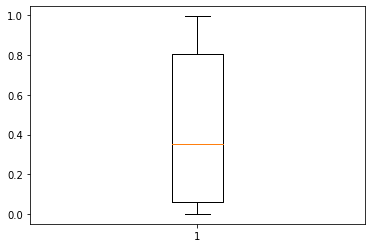

In [20]:
plt.boxplot(df["acousticness"]) 

{'boxes': [<matplotlib.lines.Line2D at 0x7f6bd63d8410>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6bd63e04d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6bd63e7510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6bd63e0f90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6bd63d8a10>,
  <matplotlib.lines.Line2D at 0x7f6bd63d8f50>]}

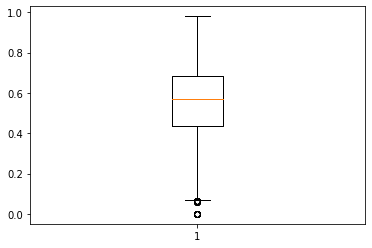

In [21]:
plt.boxplot(df["danceability"]) 

{'boxes': [<matplotlib.lines.Line2D at 0x7f6bd6a4ccd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6bd64002d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6bd686a090>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6bd63e7a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6bd6407f50>,
  <matplotlib.lines.Line2D at 0x7f6bd6396290>]}

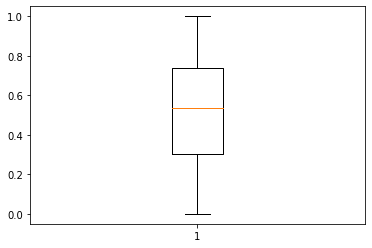

In [22]:
plt.boxplot(df["energy"]) 

{'boxes': [<matplotlib.lines.Line2D at 0x7f6bd6332610>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6bd633a6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6bd6341710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6bd63411d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6bd6332c10>,
  <matplotlib.lines.Line2D at 0x7f6bd633a190>]}

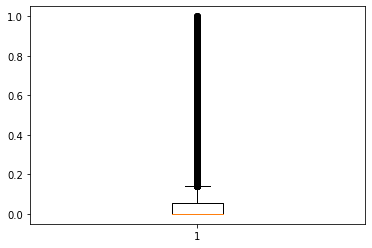

In [23]:
plt.boxplot(df["instrumentalness"]) 

{'boxes': [<matplotlib.lines.Line2D at 0x7f6bd62a3310>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6bd62a93d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6bd62b1450>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6bd62a9e90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6bd62a3910>,
  <matplotlib.lines.Line2D at 0x7f6bd62a3e50>]}

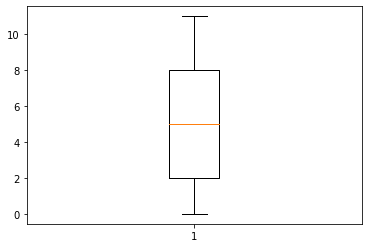

In [24]:
plt.boxplot(df["key"]) 

{'boxes': [<matplotlib.lines.Line2D at 0x7f6bd620eb50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6bd6215c10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6bd621cc50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6bd621c710>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6bd6215190>,
  <matplotlib.lines.Line2D at 0x7f6bd62156d0>]}

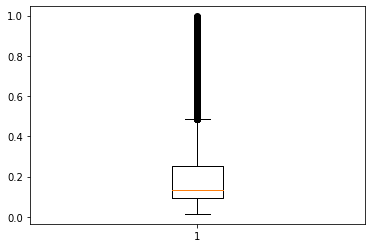

In [25]:
plt.boxplot(df["liveness"]) 

{'boxes': [<matplotlib.lines.Line2D at 0x7f6bd61ff550>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6bd6204610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6bd618d650>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6bd618d110>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6bd61ffb50>,
  <matplotlib.lines.Line2D at 0x7f6bd62040d0>]}

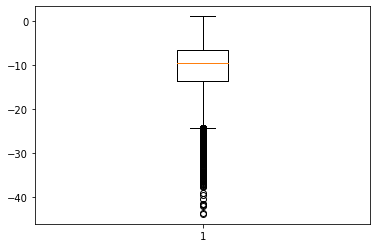

In [26]:
plt.boxplot(df["loudness"]) 

{'boxes': [<matplotlib.lines.Line2D at 0x7f6bd6168690>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6bd616f750>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6bd6177790>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6bd6177250>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6bd6168c90>,
  <matplotlib.lines.Line2D at 0x7f6bd616f210>]}

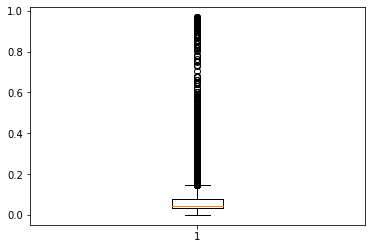

In [27]:
plt.boxplot(df["speechiness"]) 

{'boxes': [<matplotlib.lines.Line2D at 0x7f6bd60d8150>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6bd60df210>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6bd60e6250>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6bd60dfcd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6bd60d8750>,
  <matplotlib.lines.Line2D at 0x7f6bd60d8c90>]}

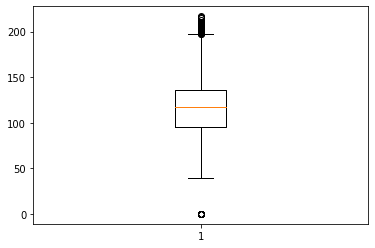

In [28]:
plt.boxplot(df["tempo"]) 

{'boxes': [<matplotlib.lines.Line2D at 0x7f6bd60c0390>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6bd60c7450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6bd604e490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6bd60c7f10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6bd60c0990>,
  <matplotlib.lines.Line2D at 0x7f6bd60c0ed0>]}

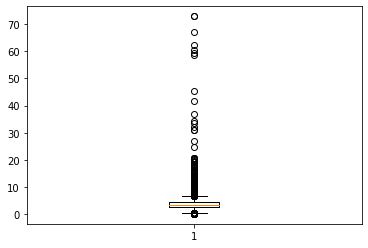

In [29]:
plt.boxplot(df["duration-min"]) 

In [30]:
df.describe()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min
count,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000
mean,8094.034350,0.430578,0.556353,0.522129,0.149321,5.205202,0.201365,-10.668687,0.097680,118.167495,0.525300,1984.517298,3.888133
std,4690.929822,0.366893,0.175373,0.262482,0.297954,3.526954,0.173987,5.506888,0.155895,30.200064,0.258205,25.911998,2.383133
min,1.000000,0.000001,0.000000,0.000020,0.000000,0.000000,0.014700,-43.738000,0.000000,0.000000,0.000000,1920.000000,0.200000
25%,4026.000000,0.058950,0.438000,0.303000,0.000000,2.000000,0.096200,-13.656000,0.034700,95.050500,0.321000,1966.000000,2.900000
50%,8093.000000,0.354000,0.569000,0.534000,0.000115,5.000000,0.132000,-9.584000,0.045600,116.915000,0.532000,1987.000000,3.600000
75%,12180.000000,0.805000,0.685000,0.739000,0.055650,8.000000,0.252000,-6.571500,0.078900,136.108500,0.737000,2008.000000,4.400000
max,16227.000000,0.996000,0.980000,1.000000,1.000000,11.000000,0.997000,1.006000,0.968000,216.843000,1.000000,2021.000000,72.800000


# Outlier Capping

In [ ]:
outlier_capping()

In [ ]:
df.describe()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min
count,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000
mean,8094.034350,0.430578,0.556430,0.522129,0.035344,5.205202,0.185707,-10.568111,0.063601,118.147426,0.525300,1984.517298,3.726675
std,4690.929822,0.366893,0.175143,0.262482,0.057485,3.526954,0.126669,5.169644,0.040009,29.924803,0.258205,25.911998,1.271851
min,1.000000,0.000001,0.067500,0.000020,0.000000,0.000000,0.014700,-24.282750,0.000000,33.463500,0.000000,1920.000000,0.650000
25%,4026.000000,0.058950,0.438000,0.303000,0.000000,2.000000,0.096200,-13.656000,0.034700,95.050500,0.321000,1966.000000,2.900000
50%,8093.000000,0.354000,0.569000,0.534000,0.000115,5.000000,0.132000,-9.584000,0.045600,116.915000,0.532000,1987.000000,3.600000
75%,12180.000000,0.805000,0.685000,0.739000,0.055650,8.000000,0.252000,-6.571500,0.078900,136.108500,0.737000,2008.000000,4.400000
max,16227.000000,0.996000,0.980000,1.000000,0.139125,11.000000,0.485700,1.006000,0.145200,197.695500,1.000000,2021.000000,6.650000


In [ ]:
df

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.9490,0.2350,0.0276,No,0.139125,5,0.4857,-24.28275,Major,01-01-1947,0.0381,110.838,0.03980,1947,3.0,very low
1,15901,0.8550,0.4560,0.4850,No,0.088400,4,0.1510,-10.04600,Major,13-11-2020,0.0437,152.066,0.85900,2020,2.4,low
2,9002,0.8270,0.4950,0.4990,No,0.000000,0,0.4010,-8.00900,Minor,01-01-1950,0.0474,108.004,0.70900,1950,2.6,very low
3,6734,0.6540,0.6430,0.4690,No,0.108000,7,0.2180,-15.91700,Major,30-04-1974,0.0368,83.636,0.96400,1974,2.4,low
4,15563,0.7380,0.7050,0.3110,No,0.000000,5,0.3220,-12.34400,Major,01-01-1973,0.0488,117.260,0.78500,1973,3.4,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,No,0.000000,1,0.3530,-5.46100,Major,01-07-2014,0.1452,81.940,0.74400,2014,3.4,average
12223,1701,0.9120,0.4510,0.2400,No,0.000002,1,0.1750,-14.01400,Major,01-01-1959,0.0351,134.009,0.70100,1959,2.0,very high
12224,3351,0.3280,0.5510,0.5640,No,0.002950,2,0.3520,-9.29800,Minor,01-01-1984,0.0338,124.883,0.89000,1984,2.5,low
12225,8879,0.1220,0.0675,0.9390,No,0.139125,1,0.4857,-24.28275,Major,09-01-2017,0.1180,73.234,0.00558,2017,3.1,high


In [48]:
df["popularity"].value_counts()

very low     3222
low          3118
average      2912
high         2606
very high     369
Name: popularity, dtype: int64

In [49]:
c = {"very low":1,"low":2,"average":3,"high":4,"very high":5}
d = {"Yes":1,"No":0}
e = {"Yes":1,"No":0}

In [50]:
df = df.replace(c)
df = df.replace(d)
df = df.replace(e)


In [51]:
cor = df.corr()['popularity'].sort_values()

In [35]:
cor

acousticness       -0.407964
instrumentalness   -0.317268
speechiness        -0.122614
liveness           -0.103116
duration-min       -0.009381
valence            -0.005329
id                  0.013905
key                 0.014269
tempo               0.076751
danceability        0.220554
explicit            0.260153
energy              0.327218
loudness            0.413219
year                0.635493
popularity          1.000000
Name: popularity, dtype: float64

In [37]:
X=df.drop(["popularity"],axis=1)

In [38]:
from sklearn.model_selection import train_test_split

In [40]:
dev_x,val_x,dev_y,val_y=train_test_split(X,df["popularity"])

In [41]:
dev_x

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min
1843,10363,0.98400,0.560,0.249,0,0.000005,11,0.1160,-10.475,Minor,01-01-1956,0.0668,111.777,0.6130,1956,2.4
94,1678,0.39900,0.409,0.226,0,0.000000,6,0.1320,-15.291,Major,01-01-1986,0.0279,67.084,0.2190,1986,3.8
11302,13217,0.10600,0.613,0.835,1,0.000000,3,0.1400,-4.051,Minor,30-10-2007,0.1770,143.876,0.6840,2007,4.3
4574,15444,0.58000,0.707,0.514,0,0.000159,9,0.0953,-8.885,Minor,01-01-1985,0.0281,86.035,0.5240,1985,4.5
5955,1722,0.97100,0.460,0.256,0,0.103000,4,0.1150,-14.835,Major,23-11-1942,0.0312,107.321,0.5330,1942,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10402,183,0.00117,0.565,0.820,0,0.534000,0,0.7210,-5.475,Major,15-12-2017,0.0422,137.991,0.0384,2017,3.2
11829,970,0.35000,0.314,0.536,0,0.008500,5,0.1270,-10.059,Major,13-07-1973,0.0322,99.812,0.2760,1973,4.1
8705,9863,0.67700,0.293,0.154,0,0.880000,4,0.1470,-15.370,Minor,01-01-1984,0.0385,70.649,0.1820,1984,4.2
9722,9570,0.21900,0.654,0.873,0,0.000028,0,0.0838,-6.010,Major,06-06-1975,0.0329,128.899,0.9670,1975,3.8


In [42]:
val_x

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min
2327,10932,0.787000,0.700,0.430,0,0.000476,1,0.129,-8.437,Minor,19-05-2015,0.0399,100.008,0.103,2015,3.7
654,12845,0.180000,0.736,0.632,0,0.000000,11,0.349,-4.939,Minor,08-10-2020,0.0648,92.030,0.503,2020,3.6
12097,2211,0.428000,0.523,0.414,0,0.000012,7,0.215,-4.401,Major,01-01-1967,0.0310,92.007,0.608,1967,3.2
368,11733,0.000129,0.325,0.929,0,0.000002,11,0.184,-5.625,Minor,26-09-1991,0.0695,133.358,0.198,1991,3.7
4930,13058,0.819000,0.481,0.234,0,0.000000,4,0.344,-11.275,Major,01-01-1962,0.0264,97.110,0.379,1962,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8211,6849,0.037800,0.490,0.872,0,0.005110,10,0.602,-6.030,Minor,26-07-2019,0.1130,107.471,0.390,2019,4.8
2204,5486,0.012600,0.764,0.567,1,0.000095,0,0.257,-8.585,Major,27-09-2013,0.0609,89.988,0.428,2013,3.3
2360,13257,0.223000,0.571,0.363,0,0.588000,0,0.108,-16.512,Major,16-01-2021,0.0320,122.647,0.281,2021,3.2
57,13017,0.662000,0.602,0.616,0,0.015300,1,0.149,-10.917,Major,03-03-1998,0.0353,108.017,0.310,1998,6.1


In [43]:
import seaborn as sn
import matplotlib.pyplot as plt